## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plt
from __future__ import division
import scipy.stats as stats
import statsmodels.formula.api as smf


pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [3]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.columns

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all', u'word_freq_3d', u'word_freq_our', u'word_freq_over', u'word_freq_remove', u'word_freq_internet', u'word_freq_order', u'word_freq_mail', u'word_freq_receive', u'word_freq_will', u'word_freq_people', u'word_freq_report', u'word_freq_addresses', u'word_freq_free', u'word_freq_business', u'word_freq_email', u'word_freq_you', u'word_freq_credit', u'word_freq_your', u'word_freq_font', u'word_freq_000', u'word_freq_money', u'word_freq_hp', u'word_freq_hpl', u'word_freq_george', u'word_freq_650', u'word_freq_lab', u'word_freq_labs', u'word_freq_telnet', u'word_freq_857', u'word_freq_data', u'word_freq_415', u'word_freq_85', u'word_freq_technology', u'word_freq_1999', u'word_freq_parts', u'word_freq_pm', u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting', u'word_freq_original', u'word_freq_project', u'word_freq_re', u'word_freq_edu', u'word_freq_table', u'word_freq_conference', u'char_freq_;', u'char_freq_(', u'char_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [4]:
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
spam_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [6]:
spam_data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0

In [7]:
#cant seem to plot all the variables against each other to check the relationships#

#sns.pairplot(spam_data, vars[“word_freq_make”, “word_freq_address”, “word_freq_all”, “word_freq_3d”, “word_freq_or”,
                            “word_freq_over”, “word_freq_remove”, “word_freq_internet”, “word_freq_order”,
                            “word_freq_mail”, “word_freq_receive”, “word_freq_will”, “word_freq_people”, “word_freq_report”,
                            “word_freq_addresses”, “word_freq_free”, “word_freq_bsiness”, “word_freq_email”, “word_freq_yo”,
                            “word_freq_credit”, “word_freq_yor”, “word_freq_font”, “word_freq_000”, “word_freq_money”,
                            “word_freq_hp”, “word_freq_hpl”, “word_freq_george”, “word_freq_650”, “word_freq_lab”,
                            “word_freq_labs”, “word_freq_telnet”, “word_freq_857”, “word_freq_data”, “word_freq_415”,
                            “word_freq_85”, “word_freq_technology”, “word_freq_1999”, “word_freq_parts”, “word_freq_pm”,
                            “word_freq_direct”, “word_freq_cs”, “word_freq_meeting”, “word_freq_original”, “word_freq_project”,
                            “word_freq_re”, “word_freq_ed”, “word_freq_table”, “word_freq_conference”], size = 1.2, aspect=1.75)#

IndentationError: unexpected indent (<ipython-input-7-9a59a37d53ee>, line 4)

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

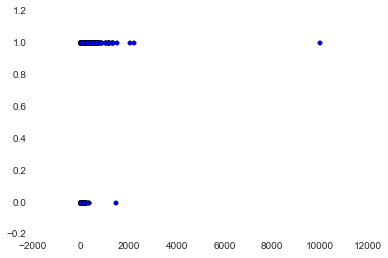

In [8]:
#plot data to visualize relationship
plt.scatter(spam_data.capital_run_length_longest, spam_data.is_spam)

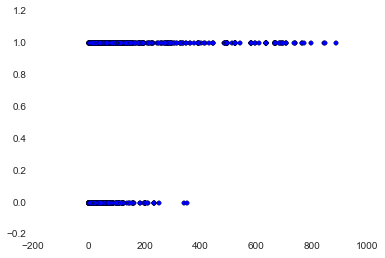

In [9]:
#removed outliers to see layout#
spam_data_reduced=spam_data[spam_data.capital_run_length_longest < 1000]
plt.scatter(spam_data_reduced.capital_run_length_longest, spam_data_reduced.is_spam)

In [10]:
#import library#
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [11]:
#defined X and Y value in model
X = spam_data[['capital_run_length_longest']].values
y = spam_data['is_spam'].values

In [12]:
#fit model and printed a summary#
logit.fit(X, y)
results=logit.fit(X, y)
print results

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)


In [13]:
#displayed an array of predictions for spam vs. not spam#
results.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
#calculated prediction score for this model#
#model is pretty accurate considering it only uses one value#
logit.score(X, y)

0.72549445772658117

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [15]:
from __future__ import division
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.linear_model import LogisticRegression as LR
from sklearn.cross_validation import train_test_split

In [16]:
#define that all variables are X#
allcls=spam_data.columns[:57]

In [17]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(spam_data[allcls].values, y, test_size=0.3, random_state=12)

In [18]:
#fit model
clf_logit = logit.fit(X_train, y_train)

In [19]:
#did prediction
y_pred = clf_logit.predict(X_test)
print y_pred

[1 0 0 ..., 1 1 0]


In [20]:
y_prob = clf_logit.predict_proba(X_test)

In [21]:
#calculated prediction score for this model#
#model is pretty accurate model#
clf_logit.score(X_test, y_test)

0.93265749456915281

In [22]:
#creating a visual to see how many times it correctly/incorrectly classifies spam#
#most of spam was correctly classified as spam/not spam#
from sklearn.metrics import confusion_matrix, classification_report
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,813,42
1,51,475


###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

In [23]:
from sklearn.cross_validation import train_test_split, cross_val_score

In [24]:
#run cross validation using different numbers of splits#
#wanted to learn how to do a four loop for this#
print cross_val_score(LogisticRegression(), spam_data[allcls].values, spam_data["is_spam"].values, cv=4).mean()
print cross_val_score(LogisticRegression(), spam_data[allcls].values, spam_data["is_spam"].values, cv=7).mean()
print cross_val_score(LogisticRegression(), spam_data[allcls].values, spam_data["is_spam"].values, cv=14).mean()
print cross_val_score(LogisticRegression(), spam_data[allcls].values, spam_data["is_spam"].values, cv=20).mean()

0.903061232199
0.909146034786
0.918914550063
0.920180257373


#### Use crossvalidation to score model

### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [25]:
from sklearn import neighbors, datasets, feature_selection
#n_neighbors = range(20, 40, 2)#

In [25]:
clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [26]:
#confirm that this is correct X and Y values#
#logistic regression was a better model to use#
clf.score(spam_data[allcls].values, spam_data["is_spam"].values)

0.86481199739187131

In [27]:
#ran cross validation on my model#
scores = cross_val_score(clf, spam_data[allcls].values, spam_data["is_spam"].values, cv=20)
print scores

[ 0.73160173  0.79220779  0.77922078  0.77922078  0.79220779  0.8008658
  0.80952381  0.7965368   0.84347826  0.80869565  0.8         0.84347826
  0.80434783  0.82532751  0.81659389  0.81222707  0.80349345  0.75982533
  0.66375546  0.81659389]


In [28]:
#score is not as great as in regression modeling#
np.mean(scores)

0.79396009376358723

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
from sklearn.ensemble import RandomForestClassifier 
clf_rforest = RandomForestClassifier(n_estimators = len(spam_data[allcls]))
clf_rforest = clf_rforest.fit(X_train,y_train)

In [31]:
#print out Feature Importance values as a data frame
from sklearn.ensemble import ExtraTreesClassifier
df_feature_importance = pd.DataFrame(clf_rforest.feature_importances_, index=allcls)
df_feature_importance.sort_index(ascending=False).head(10)

,0
word_freq_your,0.059838
word_freq_you,0.030201
word_freq_will,0.011186
word_freq_telnet,0.001960
word_freq_technology,0.003669
word_freq_table,0.000183
word_freq_report,0.001691
word_freq_remove,0.071248
word_freq_receive,0.009862
word_freq_re,0.009757


### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [32]:
from sklearn.metrics import roc_curve, auc

In [33]:
#compute the ROC curve and the area curve#
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.968486


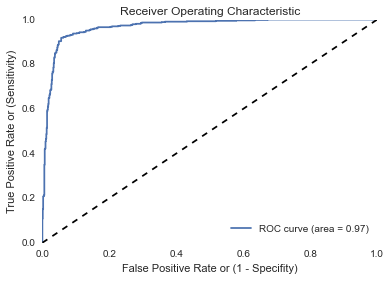

In [34]:
#plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

###Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [35]:
#created dataframe of probability#
df_prob = pd.DataFrame(y_prob)
df_prob['orig']=df_prob.loc[:, 1].map(lambda prob1: 1 if prob1 > 0.5 else 0)
y_pred_org = df_prob['orig'].values.astype(int)
df_prob

,0,1,orig
0,0.000020,9.999796e-01,1
1,0.998247,1.753287e-03,0
2,1.000000,1.195391e-23,0
3,1.000000,1.224453e-10,0
4,0.671227,3.287729e-01,0
5,0.240953,7.590467e-01,1
6,0.314313,6.856875e-01,1
7,1.000000,9.366432e-08,0
8,0.158491,8.415087e-01,1
9,1.000000,1.185403e-07,0


In [37]:
df_prob['.7pred']=df_prob.loc[:, 1].map(lambda prob1: 1 if prob1 > 0.7 else 0)
y_pred_70 = df_prob['.7pred'].values.astype(int)
df_prob

,0,1,orig,.7pred
0,0.000020,9.999796e-01,1,1
1,0.998247,1.753287e-03,0,0
2,1.000000,1.195391e-23,0,0
3,1.000000,1.224453e-10,0,0
4,0.671227,3.287729e-01,0,0
5,0.240953,7.590467e-01,1,1
6,0.314313,6.856875e-01,1,0
7,1.000000,9.366432e-08,0,0
8,0.158491,8.415087e-01,1,1
9,1.000000,1.185403e-07,0,0


In [40]:
#32% is spam with prob_70#
float(sum(df_prob['.7pred'])) / len(df_prob['.7pred'])

0.32150615496017376

In [41]:
#37% is spam with orig#
float(sum(df_prob['orig'])) / len(df_prob['orig'])

0.3743664011585807

In [42]:
#creatpd.DataFrame(confusion_matrix(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_pred_org, y_test))

,0,1
0,813,51
1,42,475


In [43]:
#creatpd.DataFrame(confusion_matrix(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_pred_70, y_test))

,0,1
0,826,111
1,29,415


###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [ ]:
#There is seems to be less more inaccurate classification when I move the threshold higher.
#specifically, there are more "faslse positives" but slightly less "false negatives" when i move the threshold up##

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [34]:
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [58]:
#would like to be able to print the chart that shows the added value for each PCA#
#pca_summary(spam_data)#

In [60]:
#utilities tools for visualizing the 2D data#
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    #plt.legend()#

In [69]:
from sklearn.decomposition import RandomizedPCA
Rpca = RandomizedPCA(n_components=2, whiten=True)
Rpca.fit(spam_data[allcls].values)

RandomizedPCA(copy=True, iterated_power=3, n_components=2, random_state=None,
       whiten=True)

In [62]:
Rpca.components_

array([[ 0.00513162]])

In [63]:
Rpca.explained_variance_ratio_

array([ 1.])

In [64]:
Rpca.explained_variance_ratio_.sum()

0.99999999999999001

In [70]:
X_Rpca=Rpca.transform(spam_data[allcls].values)

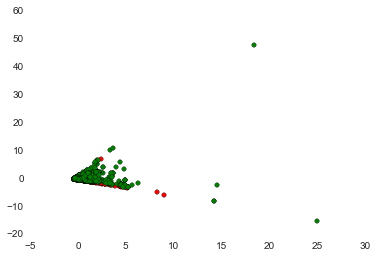

In [71]:
#not sure why my graph looks weird, should have scaled maybe?#
plot_PCA_2D(X_Rpca, y, y)